<a href="https://colab.research.google.com/github/SheilKumar/DynamicSystemRNNs/blob/master/DynamicSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1FS3cBYRf83HTWo6J88kKAQr4kjgoIw_C#scrollTo=LfELTXphq6Ps">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/SheilKumar/DynamicSystemRNNs">
        <img src="http://introtodeeplearning.com/images/colab/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import models
from Evaluate import Evaluate

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 10;

___
# 1.0 Lorentz System 
___
The first system we will attempt to train our network to predict is the **Lorentz System**:

![Alt Text](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)


 

# 1.1 Simulation of Lorentz System 
___

In [ ]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 300.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

# 1.2 Training a Network 

In order to train an RNN, we need to first generate and split data from the Lorentz system into a training and testing set. We then need to create the structure of the LSTM that will be used. Finally we need to train the RNN and evaluate its results.



## 1.2.1 Generate and Split Data


In [ ]:
# Genereate data
# create vectors of the first 5 states and expected vector of the 6th state 
Data = [[states[i+j]/(100/0.1) for i in range(5)] for j in range(len(states)-5)] # Dividing by (100/0.1) to normalize the data
Target = [states[i+5]/(100/0.1) for i in range(len(states)-5)]
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)
print(data.shape,target.shape)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

## 1.2.2 Create Model

In [ ]:
model=Sequential()
model.add(LSTM((3),batch_input_shape=(None,5,3),return_sequences=True))
model.add(LSTM((3),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

## 1.2.3 Train Model 

In [ ]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

## 1.2.4 Evaluate Model

In [ ]:
results = model.predict(x_test)
#x values
plt.scatter(range(500),results[0:500,0],c='r')
plt.scatter(range(500),y_test[0:500,0],c='g')
plt.show()

In [ ]:
#y values
plt.scatter(range(500),results[0:500,1],c='r')
plt.scatter(range(500),y_test[0:500,1],c='g')
plt.show()

In [ ]:
#z values
plt.scatter(range(500),results[0:500,1],c='r')
plt.scatter(range(500),y_test[0:500,1],c='g')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.show()

As can be seen by the two plots, our model is able to predict the next state of the system with great accuracy and the loss is almost stagnant by 40 epochs. 


## 1.2.5 Closing the Loop 

We will attempt to use the model to complete the loop and attain a similar image as shown in section 1.1


In [ ]:
np.array(Data).shape

In [ ]:
x_range = np.array(Data[0:5000])
y_range = model.predict(x_range)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y_range[:, 0]*1000, y_range[:, 1]*1000, y_range[:, 2]*1000)
plt.draw()
plt.show()


In [ ]:
new_data = np.array([[y_range[i+j]for i in range(5)] for j in range(1)])
y_new = []
new_data

In [ ]:
states[-6:],current

In [ ]:

current = np.array([states[-6:-1]])/1000
model.predict(current)*1000-states[-1]

In [ ]:
hist=30
current = np.array([states[-hist:-hist+5]])/1000
for i in range(hist-5):
  current[0,:4]= current[0,1:]
  current[0,4] = model.predict(current)
  print(current[0,4])

In [ ]:
new_data, model.predict(new_data)

In [ ]:
y_range[:7]

In [ ]:
y_new=[]
#giving the model only 5 previous states
for i in range(50):
  y_n = np.array(model.predict(new_data))
  new_data[0][0:3] = new_data[0][1:4]
  new_data[0][4] = y_n
  y_new.append(y_n)
 

In [ ]:
y_range[:7]

In [ ]:
y_new = np.array(y_new)
new_data

In [ ]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y_new[:, 0,0]*1000, y_new[:,0,1]*1000, y_new[:,0,2]*1000)
plt.draw()
plt.show()

In [ ]:
#giivng the model 100 previous states
new_data = np.array([[y_range[i+j]for i in range(5)] for j in range(100)])
y_new = []

In [ ]:
for i in range(5000):
  y_n = np.array(model.predict(new_data))
  new_data[0:98] = new_data[1:99]
  new_data[99][0:3] = new_data[99][1:4]
  new_data[99][4] = y_n[-1]
  y_new.append(y_n[-1])
 

In [ ]:
y_new = np.array(y_new)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y_new[:,0]*1000, y_new[:,1]*1000, y_new[:,2]*1000)
plt.draw()
plt.show()

# 2.0 Rethinking the Network

In the previous iteration of our LSTM, our input consisted of the 5 previous states of the system, and we attempted to predict the next state from those previous states. As we saw from our result, while it worked well with the training data and the testing data. The network was unable to "close the loop"; it was unable to correctly reproduce the very first figure shown in **Section 1.1 Simulation of Lorentz System**. Therefore we must come up with a new idea for the network  

# 2.1 Changing the output

Now we will attempt to change the network such that it is trained to figure out the delta between the current and next states. That is, given states $A_1,A_2,...,A_n$ we will train the network to predict $A_{n+1}-A_n$. Our hope is that this methodology will make better use of the LSTM's architecture, that is, we hope that the LSTM's **gates** are more readily used to train the network more effectively. 


In [ ]:
#To generate new data, we can continue to use `states` from 1.1
# create vectors of the first A_1,..,A_n states, and target vector which is A_{n+1}-A_n 
n = 100     #length of each input vector
s = 1000    #number of input vectors
Data = np.array([[states[i+j] for i in range(n)] for j in range(s)])
Target = np.array([states[i+n]-states[i+n-1] for i in range(s)])
Data.shape, Target.shape
#[samples, time steps, features(x,y,z)]

In [ ]:
Data[0][n-1], states[100]-states[99], Target[0] #checking the data is exactly what we want

In [ ]:
#split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(Data,Target,test_size=0.2,random_state=4)
x_train.shape, x_test.shape

In [ ]:
model2 = Sequential()
model2.add(
    keras.layers.LSTM(units=50,return_sequences=True)
)
model2.add(keras.layers.Dropout(rate=0.2))
model2.add(
    keras.layers.LSTM(units=50)
)
model2.add(keras.layers.Dropout(rate=0.2))
model2.add(keras.layers.Dense(units=3))
model2.compile(loss="mean_squared_error", optimizer="adam")


In [ ]:
model2.summary()

In [ ]:
history_model2 = model2.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),shuffle=False)

In [ ]:
y_pred2 = model2.predict(x_test)
y_pred2[20], y_test[20]

In [ ]:
np.array(f(x_test[20][-1],1))*0.01,yt

 ## 2.1.1 Predicting on Unseen Data


In [ ]:
# we need to create new data to see how 
np.random.seed(400)
random_numbers = np.random.randint(1500,2000,size=50)
new_data = np.array([[states[i+j] for i in range(n)] for j in random_numbers])
new_target = np.array([states[i+n]-states[i+n-1] for i in random_numbers])
random_pred = model2.predict(new_data)
x = 0
new_data[x][-1],random_pred[32],new_target[32]

In [ ]:
random_numbers

# 2.1.2 Evaluation 

It seems to be that the LSTM is still unable to accurately predict on unseen data. I believe that the reason for this might be due to the ranges of the values of the data being too great. So now we will attempt to use a scaler to transform all the values of the data t values between 0 and 1 and then inverse transform the values back after modelling. 


In [ ]:
z = np.array([0,12,4,546,5,3]).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit_transform(z)
scaler.inverse_transform(np.array([0.05,0.06,0.3,0.4]).reshape(-1,1))

In [ ]:
z.shape

In [ ]:
def generator2():
    for i in range(10):
        yield i

o = generator2()
o

In [ ]:
for i in o:
  print(i)

In [ ]:
o.__next__()

This range is too much for the LSTM to be trained on we need to scale values between 0 and 1 or -1 and 1. So that the network is able to learn better.

# 3.1 Creating from scratch 

**1.** Generate Window function 

* Input:
    * Data (Complete Dataset)
    * Batch Size
    * Time Steps 

* Output:
    * X and Y Datasets 

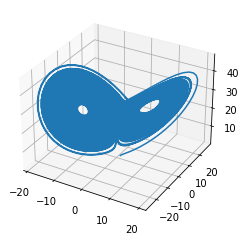

In [8]:
# Adding states here for ease of access again. Same as in 1.0 
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 300.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

In [ ]:
def get_window(data,batch_size, time_steps,start_id=1):
  x_data = np.array([data[i+start_id:i+start_id+time_steps] for i in range(batch_size) ])
  y_data = np.array([data[i+start_id+1:i+start_id+time_steps+1]-data[i+start_id:i+start_id+time_steps]for i in range(batch_size)])
  x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle=False)
  return x_train,x_test,y_train,y_test

In [ ]:
#testin get_window
np.random.seed(2808)
x_train,x_test,y_train,y_test = get_window(states,16000,1)

In [ ]:
x_train.shape,y_train.shape

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    # Shape => [batch, time, features]
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Dense(units=3)
])

In [ ]:
lstm_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
history = lstm_model.fit(x_train,y_train, epochs=25, validation_data=(x_test,y_test))

In [ ]:
lstm_model.summary()

In [ ]:
lstm_model.predict(x_test)[1:10,:,:]+x_test[0:9,:,:], x_test[1:10,:,:]

## 3.2 Predicting on Random Data Again



In [ ]:
new_data = get_window(states,100,100,2400)
x_new_data = new_data[0]
pred_new_data = lstm_model.predict(x_new_data)

In [ ]:
t = np.arange(0,99,1)

plt.plot(t,pred_new_data[0,1:100,0]+x_new_data[0,0:99,0],'r--',label='Predicted')
plt.plot(t,x_new_data[0,1:100,0],'b-',label='Actual')
plt.xlabel('Index Value')
plt.ylabel('Cell Value')
plt.title('Comparing Predicted and Actual Values on unseen Data')
plt.legend()
plt.show()

## 3.3 Closing the Loop


In [ ]:
def teach_lstm(data,start_index,model,trans=400):
  for i in range(trans):
    model.predict(tf.expand_dims(tf.expand_dims(data[start_index-trans+i],0),0))
  return None

In [ ]:
def close_loop(data,num_loops,model,start_index,trans=400):
  teach_lstm(data,start_index,model,trans)
  old_state = tf.expand_dims(tf.expand_dims(data[start_index],0),0)
  predicted_states = []
  for i in range(num_loops):
    new_state = model.predict(old_state)+old_state
    old_state = new_state
    predicted_states.append(np.squeeze(np.squeeze(old_state,0),0))
  return np.array(predicted_states)

In [ ]:
init_state = 25000
loops = 100

In [ ]:
test = close_loop(states,loops,lstm_model,init_state,400)

In [ ]:
test-states[init_state:init_state+loops]

In [ ]:
coord = 2

plt.plot(test[:,coord],'r--',label='Predicted')
plt.plot(states[init_state+1:init_state+loops+1,coord],'b-',label='Actual')
plt.plot(test[:,coord]-states[init_state+1:init_state+loops+1,coord],'y-',label="Difference")
plt.xlabel('Index Number')
plt.ylabel('Cell Value')
plt.title('Comparing Predicted and Actual Values on unseen z-coordinate Data')
plt.legend()
#images_dir = '/content/gdrive/My Drive'
#plt.savefig(f"{images_dir}/z_coord.png")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(test[:,0], test[:, 1], test[:,2])
plt.draw()
plt.show()

# Progress Report 

This excerpt shall serve as a reminder for all the work done so far. It will also help guide further progress and can serve as a baseline if one is to forget anything moving forward.


## Data Structure 

```python
def get_window(data,batch_size, time_steps,start_id=1):
  x_data = np.array([data[i+start_id:i+start_id+time_steps] for i in range(batch_size) ])
  y_data = np.array([data[i+start_id+1:i+start_id+time_steps+1]-data[i+start_id:i+start_id+time_steps]for i in range(batch_size)])
  x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle=False)
  return x_train,x_test,y_train,y_test
```
Function used to create the data for training and testing. 

* **Inputs**: 
    * `data`: Array containing data from the Lorentz Attractor. 
    * `batch_size`: Number of training batches to be created.
    * `time_steps`: Number of consecutive time steps per batch. $\Delta t$ = 0.01
    * `start_id`: Index number of `data` to begin creating training and testing sets from. 

![](https://i.imgur.com/oprpK6v.jpeg)

* **Outputs**
    * `x_train`: Input data to train the network.
    * `x_test`: Validation input data to test the network
    * `y_train`: Target data to train the network.
    * `y_test`: Validation target data to test the network.

## Network Architecture 

```python
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    # Shape => [batch, time, features]
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Dense(units=3)
])
```


* Cell type: LSTM
* RNN Units: 256 
* Dense Layer: 3 Neurons 
* Input Shape: \[X,1,3\] X=12,800 during training 
* Output Shape: \[X,1,3\]

The network is currently given 12,800 individual points to be trained. 

## Training Parameters 
```python
lstm_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])
```
```python 
history = lstm_model.fit(x_train,y_train, epochs=30, validation_data=(x_test,y_test))
```

* Loss Function: Mean Squared Error
* Optimizer = Adam 
* Metric = Mean Absolute Error 
* Epochs: 30 

## Total Parameters 

* num_features = 3 (x,y,z)
* LSTM_units = 256 (But can be changed in the future)

* LSTM Parameters = $4\cdot(\text{LSTM_units})\cdot(\text{LSTM_units}+\text{num_features}+1))=4(256(256+3+3))=266240$
* Dense Parameters = $\text{num_features}\cdot(\text{LSTM_units}+1)=3(256+1)=771$
* Total Parameters = $266240+771=267011$


## Results 

The `teach_lstm` function is used to bring the LSTM internal state as close as possible to just before the data used for closing the loop. The `close_loop` function uses `teach_lstm` inside it before beginning to predicate states.

```python
def teach_lstm(data,start_index,model,trans=400):
  for i in range(trans):
    model.predict(tf.expand_dims(tf.expand_dims(data[start_index-trans+i],0),0))
  return None
```
```python
def close_loop(data,num_loops,model,start_index,trans=400):
  teach_lstm(data,start_index,model,trans)
  old_state = tf.expand_dims(tf.expand_dims(data[start_index],0),0)
  predicted_states = []
  for i in range(num_loops):
    new_state = model.predict(old_state)+old_state
    old_state = new_state
    predicted_states.append(np.squeeze(np.squeeze(old_state,0),0))
  return np.array(predicted_states)
```

* **Inputs**:
    * `data`: Array containing data from the Lorentz attractor. 
    * `num_loops`: Number of states to be predicted.
    * `model`: Model used to predict data.
    * `start_index`: Index number of `data to begin predicting from. (Reccomended to used indexes greater than 16000 so that the model has not seen the points yet)
    * `trans`: Number of previous states used to adjust the LSTM internal state. 

* **Outputs**:
    * `predicted_states`: An `np.array` of predicted states.

### Accuracy Tests 

Beginning with a starting index of 25000 and predicting 100 consecutive time steps. 

```python
init_state = 25000
loops = 100
test = close_loop(states,loops,lstm_model,init_state,400)
```


![](https://i.imgur.com/2zuy3Fx.png)
![](https://i.imgur.com/qs76LGF.png)
![](https://i.imgur.com/iGJGdHn.png)





## Lyapunov Exponent
We will not begin tring to characterize the attractor using the Lyapanov exponent, first we will simulate our states variable from 0-2000 to ensure that the point is on the attractor, then well will crete two systems from that point.

1. A normal system from that point.
2. A perturbed system.

We will then calculate $d$: the difference betweeen the normal and the perturbed system and plot $\log{d}$.
 

In [9]:
state0 = [1.0, 1.0, 1.0]
t_initial = np.arange(0.0, 20.0, 0.01)
t_final = np.arange(20,200,0.01)
initial_states = odeint(f,state0,t_initial)
unperturbed_states = odeint(f,initial_states[-1],t_final)
perturbed_states = odeint(f,initial_states[-1]+[1e-7,0,0],t_final)

In [32]:
difference= np.linalg.norm(unperturbed_states-perturbed_states, axis=1)
difference
x = np.linspace(0,40,4000)

No handles with labels found to put in legend.


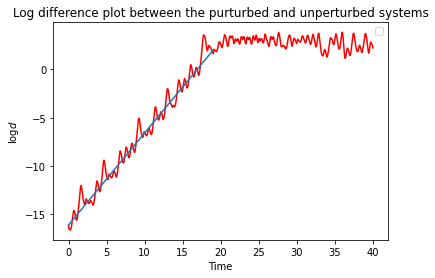

In [39]:
plt.plot(x,np.log(difference)[0:4000],'r')
plt.plot(0.9056*np.linspace(0,20,20)+np.log(difference[0]))
plt.xlabel('Time')
plt.ylabel('$\log{d}$')
plt.title('Log difference plot between the purturbed and unperturbed systems')
plt.legend()
plt.show()

# Lyapunov Exponent for Simulated Data  

We will test the lyapunov exponent for the original system we trained using 256 RNN units and 3 dense untis after 25 epochs using the same optimizers and loss functions.

In [10]:
#creating data.
Attractor_Data = models.Data([1,1,1],30000,0.01) # created 30000 points begining from [1,1,1] using a timestep of 0.01 
Attractor_Data.getData() #creates the training and testing data starting from point 5000 on the attractor. 

## Lyapunov for 256 LSTM neurons, 25 epochs

Epoch 1/25
400/400 [==============================] - 3s 4ms/step - loss: 0.0524 - mean_absolute_error: 0.0673 - val_loss: 0.0067 - val_mean_absolute_error: 0.0539
Epoch 2/25
400/400 [==============================] - 1s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0355 - val_loss: 0.0029 - val_mean_absolute_error: 0.0326
Epoch 3/25
400/400 [==============================] - 2s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0307 - val_loss: 0.0018 - val_mean_absolute_error: 0.0268
Epoch 4/25
400/400 [==============================] - 1s 4ms/step - loss: 0.0016 - mean_absolute_error: 0.0240 - val_loss: 0.0011 - val_mean_absolute_error: 0.0192
Epoch 5/25
400/400 [==============================] - 1s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0213 - val_loss: 7.6559e-04 - val_mean_absolute_error: 0.0159
Epoch 6/25
400/400 [==============================] - 2s 4ms/step - loss: 7.1962e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0011 - val_mean_absolute_error: 0.0219
Epoch 7/

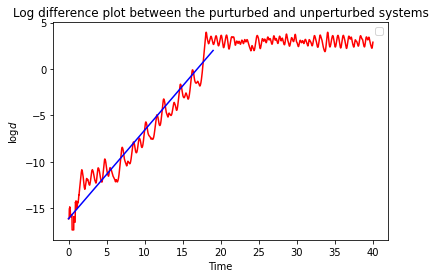

In [12]:
fig,ax = plt.subplots()
Eval256_25 = Evaluate(Attractor_Data,256,3,25,ax)

## Lyapunov for 128 LSTM Neurons, 25 epochs 

Epoch 1/25
400/400 [==============================] - 3s 3ms/step - loss: 0.0675 - mean_absolute_error: 0.0711 - val_loss: 0.0062 - val_mean_absolute_error: 0.0432
Epoch 2/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0048 - mean_absolute_error: 0.0402 - val_loss: 0.0036 - val_mean_absolute_error: 0.0355
Epoch 3/25
400/400 [==============================] - 1s 3ms/step - loss: 0.0028 - mean_absolute_error: 0.0298 - val_loss: 0.0020 - val_mean_absolute_error: 0.0262
Epoch 4/25
400/400 [==============================] - 1s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0251 - val_loss: 0.0014 - val_mean_absolute_error: 0.0242
Epoch 5/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0240 - val_loss: 0.0012 - val_mean_absolute_error: 0.0188
Epoch 6/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0201 - val_loss: 0.0019 - val_mean_absolute_error: 0.0274
Epoch 7/25
400/4

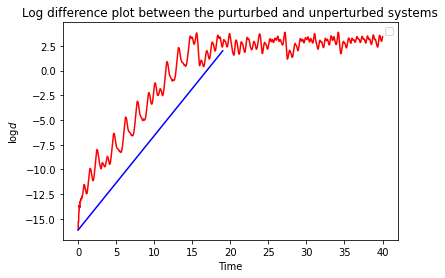

In [13]:
fig, ax = plt.subplots()
Eval128_25 = Evaluate(Attractor_Data,128,3,25,ax)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Log difference plot between the purturbed and unperturbed systems'}, xlabel='Time', ylabel='$\\log{d}$'>

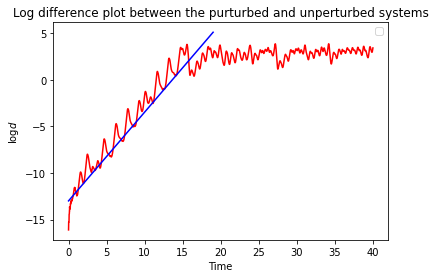

In [31]:
Eval128_25.Lyapunov.set_intercept(13)
fig,ax = plt.subplots()
Eval128_25.Lyapunov.plot_exponent(ax,0.9056)

## Lyapunov for 64 LSTM Neurons, 25 epochs 

Epoch 1/25
400/400 [==============================] - 2s 3ms/step - loss: 0.0807 - mean_absolute_error: 0.0887 - val_loss: 0.0076 - val_mean_absolute_error: 0.0471
Epoch 2/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0058 - mean_absolute_error: 0.0416 - val_loss: 0.0031 - val_mean_absolute_error: 0.0288
Epoch 3/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0032 - mean_absolute_error: 0.0307 - val_loss: 0.0022 - val_mean_absolute_error: 0.0241
Epoch 4/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0267 - val_loss: 0.0015 - val_mean_absolute_error: 0.0207
Epoch 5/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0212 - val_loss: 0.0015 - val_mean_absolute_error: 0.0225
Epoch 6/25
400/400 [==============================] - 1s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0211 - val_loss: 0.0012 - val_mean_absolute_error: 0.0198
Epoch 7/25
400/4

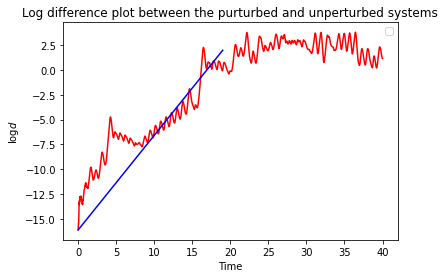

In [14]:
fig,ax = plt.subplots()
Eval64_25 = Evaluate(Attractor_Data,64,3,25,ax)

## Lyapunov for 32 LSTM neurons, 25 epochs

Epoch 1/25
400/400 [==============================] - 2s 3ms/step - loss: 0.1091 - mean_absolute_error: 0.1051 - val_loss: 0.0124 - val_mean_absolute_error: 0.0595
Epoch 2/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0108 - mean_absolute_error: 0.0565 - val_loss: 0.0065 - val_mean_absolute_error: 0.0460
Epoch 3/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0057 - mean_absolute_error: 0.0402 - val_loss: 0.0037 - val_mean_absolute_error: 0.0319
Epoch 4/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0314 - val_loss: 0.0026 - val_mean_absolute_error: 0.0279
Epoch 5/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0268 - val_loss: 0.0020 - val_mean_absolute_error: 0.0226
Epoch 6/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0236 - val_loss: 0.0013 - val_mean_absolute_error: 0.0181
Epoch 7/25
400/4

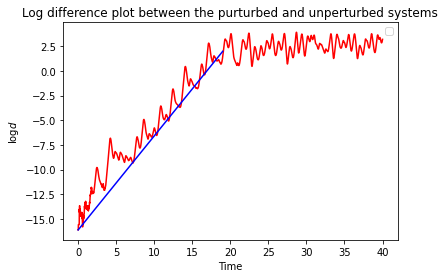

In [15]:
fig, ax = plt.subplots()
Eval32_25 = Evaluate(Attractor_Data,32,3,25,ax)

## Lyapunov for 16 LSTM neurons, 25 epochs 

Epoch 1/25
400/400 [==============================] - 2s 2ms/step - loss: 0.1386 - mean_absolute_error: 0.1323 - val_loss: 0.0258 - val_mean_absolute_error: 0.0932
Epoch 2/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0199 - mean_absolute_error: 0.0787 - val_loss: 0.0103 - val_mean_absolute_error: 0.0552
Epoch 3/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0077 - mean_absolute_error: 0.0474 - val_loss: 0.0057 - val_mean_absolute_error: 0.0404
Epoch 4/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0052 - mean_absolute_error: 0.0381 - val_loss: 0.0039 - val_mean_absolute_error: 0.0323
Epoch 5/25
400/400 [==============================] - 1s 1ms/step - loss: 0.0033 - mean_absolute_error: 0.0317 - val_loss: 0.0030 - val_mean_absolute_error: 0.0296
Epoch 6/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0301 - val_loss: 0.0023 - val_mean_absolute_error: 0.0252
Epoch 7/25
400/4

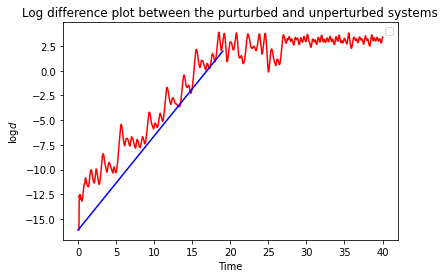

In [16]:
fig, ax = plt.subplots()
Eval16_25 = Evaluate(Attractor_Data, 16,3,25,ax)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Log difference plot between the purturbed and unperturbed systems'}, xlabel='Time', ylabel='$\\log{d}$'>

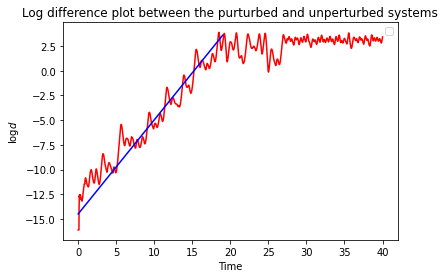

In [30]:
Eval16_25.Lyapunov.set_intercept(14.5)
fgi,ax=plt.subplots()
Eval16_25.Lyapunov.plot_exponent(ax,0.9056)

## Lyapunov for 8 LSTM neurons, 25 Epochs

Epoch 1/25
400/400 [==============================] - 2s 2ms/step - loss: 0.2469 - mean_absolute_error: 0.1854 - val_loss: 0.0877 - val_mean_absolute_error: 0.1909
Epoch 2/25
400/400 [==============================] - 1s 1ms/step - loss: 0.0787 - mean_absolute_error: 0.1798 - val_loss: 0.0440 - val_mean_absolute_error: 0.1338
Epoch 3/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.1267 - val_loss: 0.0279 - val_mean_absolute_error: 0.1042
Epoch 4/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0250 - mean_absolute_error: 0.0980 - val_loss: 0.0177 - val_mean_absolute_error: 0.0822
Epoch 5/25
400/400 [==============================] - 1s 1ms/step - loss: 0.0168 - mean_absolute_error: 0.0786 - val_loss: 0.0133 - val_mean_absolute_error: 0.0695
Epoch 6/25
400/400 [==============================] - 1s 1ms/step - loss: 0.0126 - mean_absolute_error: 0.0672 - val_loss: 0.0107 - val_mean_absolute_error: 0.0625
Epoch 7/25
400/4

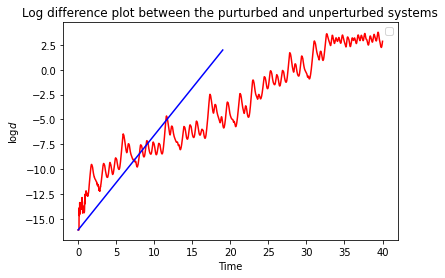

In [17]:
fig, ax =plt.subplots()
Eval8_25 = Evaluate(Attractor_Data,8,3,25,ax)

## Breakdown Evaluation 

System finally fails at 8 neurons with 25 epochs next step to try and reduce epochs beginning with 32 neurons and going down.

## Lyapunov for 32 LSTM nuerons, 15 epochs

Results not as good as expected so will try with 20 epochs instead.

Epoch 1/15
400/400 [==============================] - 2s 3ms/step - loss: 0.0850 - mean_absolute_error: 0.0993 - val_loss: 0.0124 - val_mean_absolute_error: 0.0612
Epoch 2/15
400/400 [==============================] - 1s 1ms/step - loss: 0.0095 - mean_absolute_error: 0.0535 - val_loss: 0.0066 - val_mean_absolute_error: 0.0487
Epoch 3/15
400/400 [==============================] - 1s 2ms/step - loss: 0.0049 - mean_absolute_error: 0.0398 - val_loss: 0.0032 - val_mean_absolute_error: 0.0312
Epoch 4/15
400/400 [==============================] - 1s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0327 - val_loss: 0.0023 - val_mean_absolute_error: 0.0263
Epoch 5/15
400/400 [==============================] - 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0280 - val_loss: 0.0023 - val_mean_absolute_error: 0.0268
Epoch 6/15
400/400 [==============================] - 1s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0252 - val_loss: 0.0016 - val_mean_absolute_error: 0.0235
Epoch 7/15
400/4

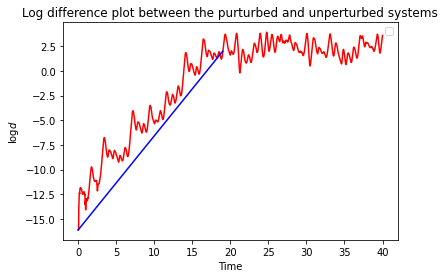

In [18]:
fig,ax = plt.subplots()
Eval32_15 = Evaluate(Attractor_Data,32,3,15,ax)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Log difference plot between the purturbed and unperturbed systems'}, xlabel='Time', ylabel='$\\log{d}$'>

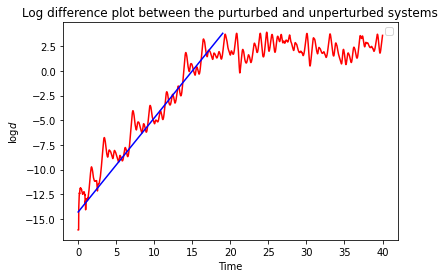

In [28]:
Eval32_15.Lyapunov.set_intercept(14.3)
fig,ax = plt.subplots()
Eval32_15.Lyapunov.plot_exponent(ax,0.9056)

## Lyapunov for 32 LSTM Neurons, 20 epochs

Epoch 1/20
400/400 [==============================] - 2s 3ms/step - loss: 0.0961 - mean_absolute_error: 0.1014 - val_loss: 0.0131 - val_mean_absolute_error: 0.0656
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0103 - mean_absolute_error: 0.0575 - val_loss: 0.0064 - val_mean_absolute_error: 0.0453
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0058 - mean_absolute_error: 0.0424 - val_loss: 0.0040 - val_mean_absolute_error: 0.0361
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0039 - mean_absolute_error: 0.0357 - val_loss: 0.0034 - val_mean_absolute_error: 0.0359
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0026 - mean_absolute_error: 0.0295 - val_loss: 0.0024 - val_mean_absolute_error: 0.0272
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0249 - val_loss: 0.0020 - val_mean_absolute_error: 0.0268
Epoch 7/20
400/4

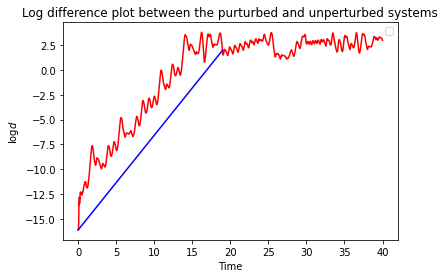

In [19]:
fig, ax = plt.subplots()
Eval32_20 = Evaluate(Attractor_Data,32,3,20,ax)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Log difference plot between the purturbed and unperturbed systems'}, xlabel='Time', ylabel='$\\log{d}$'>

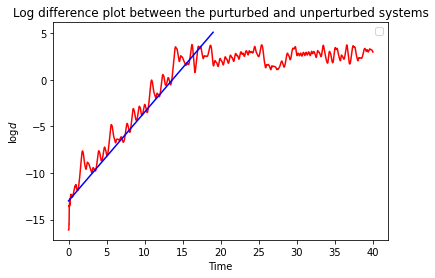

In [23]:
Eval32_20.Lyapunov.set_intercept(13)
fig,ax = plt.subplots()
Eval32_20.Lyapunov.plot_exponent(ax,0.9056) # 20 epochs seems to be enough will try with 16 neurons 

## Lyapunov for 16 LSTM neurons, 20 epochs

Epoch 1/20
400/400 [==============================] - 2s 2ms/step - loss: 0.1271 - mean_absolute_error: 0.1287 - val_loss: 0.0183 - val_mean_absolute_error: 0.0772
Epoch 2/20
400/400 [==============================] - 1s 1ms/step - loss: 0.0158 - mean_absolute_error: 0.0698 - val_loss: 0.0085 - val_mean_absolute_error: 0.0522
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0072 - mean_absolute_error: 0.0464 - val_loss: 0.0054 - val_mean_absolute_error: 0.0388
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0053 - mean_absolute_error: 0.0392 - val_loss: 0.0040 - val_mean_absolute_error: 0.0359
Epoch 5/20
400/400 [==============================] - 1s 1ms/step - loss: 0.0038 - mean_absolute_error: 0.0345 - val_loss: 0.0036 - val_mean_absolute_error: 0.0378
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.0030 - mean_absolute_error: 0.0326 - val_loss: 0.0023 - val_mean_absolute_error: 0.0270
Epoch 7/20
400/4

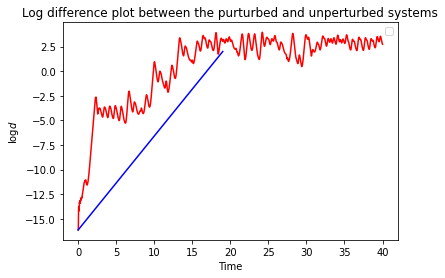

In [21]:
fig,ax = plt.subplots()
Eval16_20 = Evaluate(Attractor_Data,16,3,20,ax)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Log difference plot between the purturbed and unperturbed systems'}, xlabel='Time', ylabel='$\\log{d}$'>

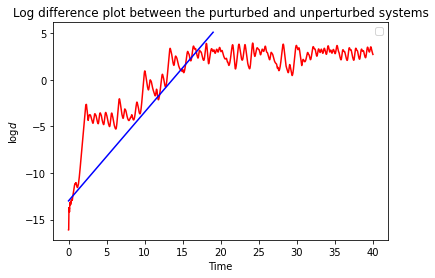

In [22]:
Eval16_20.Lyapunov.set_intercept(13)
fig, ax = plt.subplots()
Eval16_20.Lyapunov.plot_exponent(ax,0.9056)

## Results Summary 

The results are mostly as expected with small surprises:

*   Systems with 256 and 128 neurons perform as expected with Lyapunov exponents close to the literature value of **0.9056**. 
*   The system with 64 neurons has surprising results as it performs **badly** as compared to systems with fewer neurons. 
*   Systems with 32 neurons perform well even with fewer epochs. 
*   System with 16 neurons perform well with 25 epochs but breaks down at 20 epochs.
*   System with 8 neurons fails compeltely.


| LSTM Neurons | Epochs | Lyapunov Plot Results | Lyapunov Exponent |
|--------------|--------|-----------------------|-------------------|
| 256          | 25     | Good                  | ~0.9056           |
| 128          | 25     | Good                  | ~0.9056           |
| 64           | 25     | Bad                   | NaN               |
| 32           | 25     | Good                  | ~0.9056           |
| 32           | 20     | OK                    | ~0.9056           |
| 32           | 15     | OK                    | ~0.9056           |
| 16           | 25     | OK                    | ~0.9056           |
| 16           | 20     | Bad                   | NaN               |
| 8            | 25     | Very Bad              | NaN               |

In [5]:
Test  = models.LSTM(8,3)

In [11]:
Test.create_model()
Test.fit_model(25,Attractor_Data)

Epoch 1/25
400/400 [==============================] - 3s 4ms/step - loss: 0.3354 - mean_absolute_error: 0.4138 - val_loss: 0.1270 - val_mean_absolute_error: 0.2322
Epoch 2/25
400/400 [==============================] - 1s 3ms/step - loss: 0.1184 - mean_absolute_error: 0.2201 - val_loss: 0.0717 - val_mean_absolute_error: 0.1649
Epoch 3/25
400/400 [==============================] - 1s 2ms/step - loss: 0.0645 - mean_absolute_error: 0.1528 - val_loss: 0.0453 - val_mean_absolute_error: 0.1278
Epoch 4/25
400/400 [==============================] - 1s 3ms/step - loss: 0.0424 - mean_absolute_error: 0.1214 - val_loss: 0.0319 - val_mean_absolute_error: 0.1073
Epoch 5/25
400/400 [==============================] - 1s 3ms/step - loss: 0.0292 - mean_absolute_error: 0.1026 - val_loss: 0.0252 - val_mean_absolute_error: 0.0975
Epoch 6/25
400/400 [==============================] - 1s 3ms/step - loss: 0.0211 - mean_absolute_error: 0.0883 - val_loss: 0.0202 - val_mean_absolute_error: 0.0860
Epoch 7/25
400/4

In [12]:
Test.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (32, 1, 8)                384       
_________________________________________________________________
dense_4 (Dense)              (32, 1, 3)                27        
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [43]:
import models 
import numpy as np

In [44]:
num_time_steps = 16000
time_steps_per_batch = 1
start_id = 3000

In [45]:
#creating data.
Attractor_Data = models.Data([1,1,1],30000,0.01) # created 30000 points begining from [1,1,1] using a timestep of 0.01 

In [49]:
Attractor_Data.getData()

NameError: name 'x_data' is not defined

In [37]:
models.LSTM(128,3)